# Bekerja dengan Data dalam Python

Kamu bekerja sebagai seorang analyst untuk Zuber, sebuah perusahaan berbagi tumpangan (ride-sharing) baru yang diluncurkan di Chicago.

Selain data yang kamu peroleh dalam tugas sebelumnya, kamu sudah diberikan file kedua. Sekarang, kamu memiliki dua file CSV berikut:
/datasets/project_sql_result_01.csv - memuat data berikut ini:
- company_name: nama perusahaan taksi
- trips_amount: jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.

/datasets/project_sql_result_04.csv - memuat data berikut ini:
dropoff_location_name: 
- nama wilayah di Chicago tempat perjalanan berakhir
- average_trips: jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.

# Deskripsi Data
Database yang memuat informasi perjalanan taksi di Chicago:

Tabel neighborhoods: data terkait wilayah di kota Chicago
- name: nama wilayah
- neighborhood_id: kode wilayah

Tabel cabs: data terkait taksi
- cab_id: kode kendaraan
- vehicle_id: ID teknis kendaraan
- company_name: nama perusahaan yang memiliki kendaraan

Tabel trips: data terkait perjalanan
- trip_id: kode perjalanan
- cab_id: kode kendaraan yang beroperasi
- start_ts: tanggal dan waktu perjalanan dimulai (waktu dibulatkan dalam satuan jam)
- end_ts: tanggal dan waktu perjalanan berakhir (waktu dibulatkan dalam satuan jam)
- duration_seconds: durasi perjalanan dalam satuan detik
- distance_miles: jarak perjalanan dalam satuan mil
- pickup_location_id: kode wilayah penjemputan
- dropoff_location_id: kode wilayah pengantaran

Tabel weather_records: data terkait cuaca
- record_id: kode pencatatan cuaca
- ts: tanggal dan waktu saat pencatatan cuaca dilakukan (waktu dibulatkan dalam satuan jam)
- temperature: suhu saat pencatatan cuaca dilakukan
- description: deskripsi singkat tentang kondisi cuaca, seperti "light rain" (hujan ringan) atau "scattered clouds" (berawan).

# Pendahuluan
Pada saat melakukan analisis, kita perlu merumuskan beberapa hipotesis yang perlu kita uji lebih terlebih dahulu. Tidak semua hipotesis yang kita kerjakan bisa langsung digunakan, kita harus bisa memilih hipotesis mana yang paling tepat untuk menyelesaikan masalah-masalah yang ada pada data yang kita miliki. Untuk membuat keputusan yang tepat, kita harus memahami apakah asumsi yang kita buat sudah tepat atau belum.

# Tujuan
Tujuan dari project ini adalah sebagai berikut:
- Untuk mengambil data dari situs web
- Membuat irisan data
- Mengelompokkan data
- Mengombinasikan data dengan benar
- Merumuskan hipotesis
- Menguji hipotesis

# Langkah Pengerjaan:
- Tahap Analisis Data Eksploratif (Python)
    1. Mengimpor kedua file
    2. Mempelajari isi data
    3. Memastikan tipe datanya sudah benar
    4. Mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran
    5. Membuat grafik: perusahaan taksi dan jumlah perjalanannya, 10 wilayah teratas berdasarkan jumlah pengantaran
    6. Menarik kesimpulan berdasarkan grafik yang sudah dibuat dan menjelaskan hasilnya
    
    
- Tahap Menguji Hipotesis (Python)
    1. Merumuskan hipotesis nol dan hipotesis alternatif
    2. Kriteria apa yang digunakan untuk menguji hipotesis dan alasan menggunakannya

## Analisis Data Eksploratif

### Mengimpor Kedua File

In [1]:
# Impor Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Muat Data
data_company = pd.read_csv('/datasets/project_sql_result_01.csv')
data_trip = pd.read_csv('/datasets/project_sql_result_04.csv')

### Mempelajari isi data

In [3]:
data_company.info()
data_company.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
data_trip.info()
data_trip.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


### Memastikan tipe datanya sudah benar

In [5]:
data_company.dtypes

company_name    object
trips_amount     int64
dtype: object

In [6]:
data_trip.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

### Mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran

In [7]:
# Mengurutkan data berdasarkan kolom average_trips secara menurun
top_10_dropoff_locations = data_trip.sort_values(by='average_trips', ascending=False).head(10)

In [8]:
# Menampilkan 10 wilayah teratas sebagai titik pengantaran
print(top_10_dropoff_locations)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


### Membuat grafik
Grafik untuk perusahaan taksi dan jumlah perjalanannya, 10 wilayah teratas berdasarkan jumlah pengantaran.

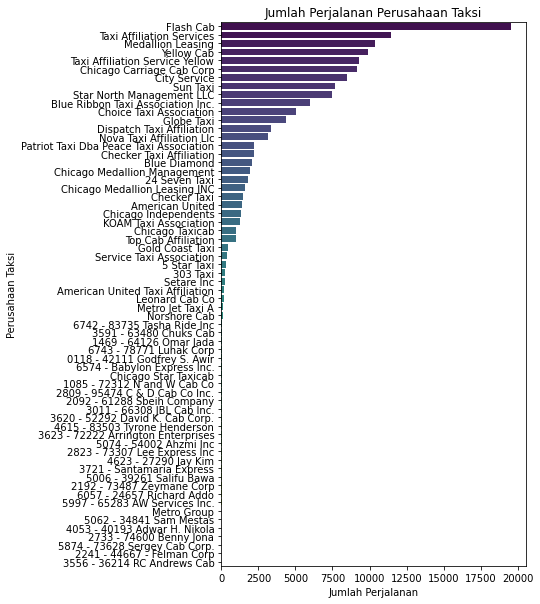

In [9]:
# Grafik untuk perusahaan taksi dan jumlah perjalanan
plt.figure(figsize=(12, 10))                    
plt.subplot(1, 2, 1)
sns.barplot(data=data_company, x='trips_amount', y='company_name', palette='viridis')
plt.xlabel('Jumlah Perjalanan')
plt.ylabel('Perusahaan Taksi')
plt.title('Jumlah Perjalanan Perusahaan Taksi')

# Atur rotasi label sumbu y
plt.yticks(rotation=0);


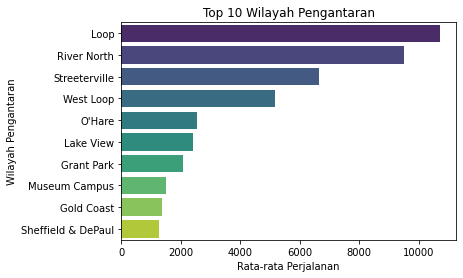

In [10]:
# Grafik untuk 10 wilayah teratas berdasarkan jumlah pengantaran
plt.subplot(1, 1, 1)
top_10_locations = data_trip.head(10)
sns.barplot(data=top_10_locations, x='average_trips', y='dropoff_location_name', palette='viridis')
plt.xlabel('Rata-rata Perjalanan')
plt.ylabel('Wilayah Pengantaran')
plt.title('Top 10 Wilayah Pengantaran')
plt.show()

### Menarik kesimpulan berdasarkan grafik yang sudah dibuat dan menjelaskan hasilnya

- Dari grafik 'Jumlah Perjalanan Perusahaan Taksi' dapat ditarik kesimpulan bahwa 3 posisi teratas yang memiliki jumlah perjalanan terbanyak adalah perusahaan taksi Flash Cab, Taxi Affiliation Services, dan Medallion Leasing. 


- Dari grafik 'Top 10 Wilayah Pengantaran' dapat ditarik kesimpulan bahwa 3 posisi teratas untuk daerah pengantaran dengan rata-rata perjalanan tertinggi / teratas adalah Loop, River North, dan Streeterville. 

## Menguji hipotesis

### Merumuskan hipotesis nol dan hipotesis alternatif
H0 = Rata-rata durasi perjalanan dari Loop ke Bandara Internasional O'Hare saat hujan di hari Sabtu adalah SAMA

H1 = Rata-rata durasi perjalanan dari Loop ke Bandara Internasional O'Hare saat hujan hari Sabtu adalah BERBEDA

In [11]:
# Muat data dari file CSV
data = pd.read_csv('/datasets/project_sql_result_07.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [12]:
# Konversi kolom start_ts ke objek datetime
data['start_ts'] = pd.to_datetime(data['start_ts'])

In [13]:
# Filter data hanya pada hari Sabtu
saturday_data = data[data['start_ts'].dt.weekday == 5]

In [14]:
# Pisahkan data ke dalam dua kelompok: saat hujan (weather_conditions == 'Bad') dan saat tidak hujan (weather_conditions == 'Good')
saturday_rain = saturday_data[saturday_data['weather_conditions'] == 'Bad']['duration_seconds']
saturday_no_rain = saturday_data[saturday_data['weather_conditions'] == 'Good']['duration_seconds']

In [15]:
# Tentukan nilai (alpha)
alpha = 0.05  

In [16]:
# Uji hipotesis levene-test
p_value_levene = stats.levene(saturday_rain, saturday_no_rain).pvalue
print(p_value_levene)

if p_value_levene < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

0.5332038671974493
Accept the null hypothesis


**Kesimpulan**

Hasil pengujian hipotesis diatas menunjukkan bahwa p-value lebih besar dari nilai alpha, maka kita menerima hipotesis nol (H0). Yang artinya perbedaan dalam varians di antara kedua kelompok tidak signifikan.

In [17]:
# Uji t-test (independen)
p_value = stats.ttest_ind(saturday_rain, saturday_no_rain, equal_var=False).pvalue

print(p_value)

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")


6.738994326108734e-12
Reject the null hypothesis


**Kesimpulan**

Hasil pengujian uji t-test independen dengan asumsi variances tidak sama (equal_var=False) diatas menunjukkan bahwa p-value lebih kecil dari nilai alpha.
Yang artinya, dari uji t-Test ditemukan bahwa terdapat perbedaan yang signifikan dalam durasi rata-rata perjalanan saat hujan dan saat tidak hujan di hari Sabtu. 

### Kriteria apa yang digunakan untuk menguji hipotesis dan alasan menggunakannya

1. Levene Test (Levene's Test for Equality of Variances):

- Saya menggunakan Levene Test untuk menguji apakah dua kelompok data memiliki varian yang homogen atau sejenis.

- Alasan: Pengujian homogenitas varian penting karena metode statistik seperti t-test mengasumsikan homogenitas varian. Jika ditemukan hasil varian tidak homogen, maka kita perlu mengadaptasi metode pengujian agar sesuai dengan kondisi sebenarnya.

2. t-Test (Independent):

- Saya menggunakan t-Test untuk membandingkan rata-rata antara dua kelompok data independen (tidak berpasangan).

- Alasan: t-Test untuk menguji apakah ada perbedaan signifikan antara rata-rata durasi perjalanan di hari Sabtu saat cuaca buruk (hujan) dan saat cuaca baik (tidak hujan). t-Test membantu menentukan apakah perbedaan ini bersifat acak atau signifikan secara statistik.

## Kesimpulan Umum

**1. Kesimpulan Tahap Analisis Data Eksploratif** :

Menarik kesimpulan berdasarkan grafik yang sudah dibuat dan menjelaskan hasilnya
  - Dari grafik 'Jumlah Perjalanan Perusahaan Taksi' dapat ditarik kesimpulan bahwa 3 posisi teratas yang memiliki jumlah perjalanan terbanyak adalah perusahaan taksi Flash Cab, Taxi Affiliation Services, dan Medallion Leasing.
  - Dari grafik 'Top 10 Wilayah Pengantaran' dapat ditarik kesimpulan bahwa 3 posisi teratas untuk daerah pengantaran dengan rata-rata perjalanan tertinggi / teratas adalah Loop, River North, dan Streeterville
  
    
**2. Kesimpulan Tahap Uji Hipotesis** :

- Hasil pengujian hipotesis diatas menunjukkan bahwa p-value lebih besar dari nilai alpha, maka kita menerima hipotesis nol (H0). Yang artinya perbedaan dalam varians di antara kedua kelompok tidak signifikan.

- Hasil pengujian uji t-test independen dengan asumsi variances tidak sama (equal_var=False) diatas menunjukkan bahwa p-value lebih kecil dari nilai alpha.
Yang artinya, dari uji t-Test ditemukan bahwa terdapat perbedaan yang signifikan dalam durasi rata-rata perjalanan saat hujan dan saat tidak hujan di hari Sabtu. 

